In [222]:
import pandas as pd
import matplotlib.pyplot as plt

In [179]:
frame1=pd.read_csv('2016-first-quarter-calls-for-service.csv')

In [180]:
frame2=pd.read_csv('2016-second-quarter-calls-for-service.csv')

In [181]:
frame3=pd.read_csv('2016-third-quarter-calls-for-service.csv')

In [182]:
frame4=pd.read_csv('2016-fourth-quarter-calls-for-service.csv')

In [183]:
frames=[frame1, frame2, frame3, frame4]
all_calls=pd.concat(frames)

In [184]:
all_calls.head

<bound method NDFrame.head of       Case Number Date Reported Time Reported Month Reported  \
0       B16-12080     3/31/2016         23:58          March   
1       B16-12079     3/31/2016         23:55          March   
2       B16-12078     3/31/2016         23:39          March   
3       B16-12077     3/31/2016         23:39          March   
4       B16-12076     3/31/2016         23:35          March   
...           ...           ...           ...            ...   
12179   B16-39231     10/1/2016          0:27        October   
12180   B16-39223     10/1/2016          0:24        October   
12181   B16-39228     10/1/2016          0:24        October   
12182   B16-39222     10/1/2016          0:18        October   
12183   B16-39221     10/1/2016          0:07        October   

      Day of Week Reported Nature of Call for Service District Agency  \
0                 Thursday                      NOISE    LB519    BPD   
1                 Thursday               TRAFFIC STOP  

In [185]:
all_calls.columns

Index(['Case Number', 'Date Reported', 'Time Reported', 'Month Reported',
       'Day of Week Reported', 'Nature of Call for Service', 'District',
       'Agency', 'Report/No Report'],
      dtype='object')

In [186]:
clean_all_calls=all_calls.drop(['Day of Week Reported'], axis=1)

In [187]:
clean_all_calls.dtypes

Case Number                   object
Date Reported                 object
Time Reported                 object
Month Reported                object
Nature of Call for Service    object
District                      object
Agency                        object
Report/No Report              object
dtype: object

In [188]:
clean_all_calls['Date Reported']+' '+clean_all_calls['Time Reported']

0        3/31/2016 23:58
1        3/31/2016 23:55
2        3/31/2016 23:39
3        3/31/2016 23:39
4        3/31/2016 23:35
              ...       
12179     10/1/2016 0:27
12180     10/1/2016 0:24
12181     10/1/2016 0:24
12182     10/1/2016 0:18
12183     10/1/2016 0:07
Length: 51316, dtype: object

In [189]:
clean_all_calls['Date Reported Time Reported']=pd.to_datetime(clean_all_calls['Date Reported']+' '+clean_all_calls['Time Reported'])

In [194]:
clean_all_calls=clean_all_calls.drop(['Month Reported','Date Reported','Time Reported'], axis=1)

In [195]:
clean_all_calls.fillna(0, inplace=True)

In [196]:
clean_all_calls.isnull().any()

Case Number                    False
Nature of Call for Service     False
District                       False
Agency                         False
Report/No Report               False
Date Reported Time Reported    False
dtype: bool

In [197]:
clean_all_calls.head

<bound method NDFrame.head of       Case Number Nature of Call for Service District Agency  \
0       B16-12080                      NOISE    LB519    BPD   
1       B16-12079               TRAFFIC STOP    LIU14    BPD   
2       B16-12078               VEH THEFT NP    LB221    BPD   
3       B16-12077               TRAFFIC STOP    LMS29    BPD   
4       B16-12076                 WEAPONS IP    LB513    BPD   
...           ...                        ...      ...    ...   
12179   B16-39231                      NOISE    LB212    BPD   
12180   B16-39223             ACCIDENT PD IP    LB519    BPD   
12181   B16-39228                      NOISE    LB519    BPD   
12182   B16-39222            ACCIDENT LSA IP    LB102    BPD   
12183   B16-39221             ACCIDENT PD IP    LB101    BPD   

       Report/No Report Date Reported Time Reported  
0             No report         2016-03-31 23:58:00  
1             No report         2016-03-31 23:55:00  
2                Report         2016-03

In [226]:
pd.get_dummies(clean_all_calls, columns=['Nature of Call for Service'])
clean_all_calls['District']=clean_all_calls['District'].astype('category')
clean_all_calls['Agency']=clean_all_calls['Agency'].astype('category')
clean_all_calls['Report/No Report']=clean_all_calls['Report/No Report'].astype('category')

In [227]:
clean_all_calls.dtypes

Case Number                            object
Nature of Call for Service           category
District                             category
Agency                               category
Report/No Report                     category
Date Reported Time Reported    datetime64[ns]
dtype: object

In [159]:
only_crashes=pd.read_csv('crash-data-bloomington_2013-to-2018.csv', encoding='ISO-8859-1')

In [160]:
only_crashes.head

<bound method NDFrame.head of       Agency         City        DATE   TIME  VEH#  Trailers  INJ  DEAD  DEER  \
0       MCSD  BLOOMINGTON   7/30/2014   1:16     1         0  0.0   0.0   0.0   
1        BPD  BLOOMINGTON   5/11/2015   9:50     2         0  0.0   0.0   0.0   
2        BPD  BLOOMINGTON    1/4/2016  14:06     2         0  0.0   0.0   0.0   
3        BPD  BLOOMINGTON   6/14/2016  15:00     2         0  0.0   0.0   0.0   
4        BPD  BLOOMINGTON    8/6/2013   0:00     1         0  1.0   0.0   0.0   
...      ...          ...         ...    ...   ...       ...  ...   ...   ...   
22406   MCSD  BLOOMINGTON  11/16/2018  17:58     2         0  0.0   0.0   0.0   
22407   MCSD  BLOOMINGTON  12/12/2015   3:21     2         0  0.0   0.0   0.0   
22408    BPD  BLOOMINGTON   11/6/2017   7:50     2         0  0.0   0.0   0.0   
22409   MCSD  BLOOMINGTON   6/16/2016  19:28     1         0  1.0   0.0   0.0   
22410   MCSD  BLOOMINGTON  12/19/2015   1:44     1         0  0.0   0.0   0.0  

In [161]:
only_crashes.dtypes

Agency              object
City                object
DATE                object
TIME                object
VEH#                 int64
Trailers             int64
INJ                float64
DEAD               float64
DEER               float64
House#              object
Roadway Id          object
Intersect Rd.       object
Interchange         object
Ramp                object
Property Type       object
Feet From          float64
Dir                 object
Latitude           float64
Longitude          float64
Road Class          object
H&R                 object
Locality            object
School              object
Rumble Strips       object
CN Zone             object
CN Type             object
Light               object
Weather             object
Surf Con            object
Median              object
Rd Junction         object
Road Char           object
Surface             object
Primary Factor      object
Collision Type      object
Unique Id           object
Traffic Control     object
d

In [162]:
only_crashes['DATE']+' '+only_crashes['TIME']

0          7/30/2014 1:16
1          5/11/2015 9:50
2          1/4/2016 14:06
3         6/14/2016 15:00
4           8/6/2013 0:00
               ...       
22406    11/16/2018 17:58
22407     12/12/2015 3:21
22408      11/6/2017 7:50
22409     6/16/2016 19:28
22410     12/19/2015 1:44
Length: 22411, dtype: object

In [163]:
only_crashes['DATE TIME']=pd.to_datetime(only_crashes['DATE']+' '+only_crashes['TIME'])

In [164]:
only_crashes.head

<bound method NDFrame.head of       Agency         City        DATE   TIME  VEH#  Trailers  INJ  DEAD  DEER  \
0       MCSD  BLOOMINGTON   7/30/2014   1:16     1         0  0.0   0.0   0.0   
1        BPD  BLOOMINGTON   5/11/2015   9:50     2         0  0.0   0.0   0.0   
2        BPD  BLOOMINGTON    1/4/2016  14:06     2         0  0.0   0.0   0.0   
3        BPD  BLOOMINGTON   6/14/2016  15:00     2         0  0.0   0.0   0.0   
4        BPD  BLOOMINGTON    8/6/2013   0:00     1         0  1.0   0.0   0.0   
...      ...          ...         ...    ...   ...       ...  ...   ...   ...   
22406   MCSD  BLOOMINGTON  11/16/2018  17:58     2         0  0.0   0.0   0.0   
22407   MCSD  BLOOMINGTON  12/12/2015   3:21     2         0  0.0   0.0   0.0   
22408    BPD  BLOOMINGTON   11/6/2017   7:50     2         0  0.0   0.0   0.0   
22409   MCSD  BLOOMINGTON   6/16/2016  19:28     1         0  1.0   0.0   0.0   
22410   MCSD  BLOOMINGTON  12/19/2015   1:44     1         0  0.0   0.0   0.0  

In [174]:
only_crashes.fillna(0, inplace=True)

In [176]:
only_crashes.isnull().any()

Agency             False
City               False
DATE               False
TIME               False
VEH#               False
Trailers           False
INJ                False
DEAD               False
DEER               False
House#             False
Roadway Id         False
Intersect Rd.      False
Interchange        False
Ramp               False
Property Type      False
Feet From          False
Dir                False
Latitude           False
Longitude          False
Road Class         False
H&R                False
Locality           False
School             False
Rumble Strips      False
CN Zone            False
CN Type            False
Light              False
Weather            False
Surf Con           False
Median             False
Rd Junction        False
Road Char          False
Surface            False
Primary Factor     False
Collision Type     False
Unique Id          False
Traffic Control    False
DATE TIME          False
dtype: bool

In [207]:
clean_only_crashes=only_crashes.drop(['DATE','TIME'], axis=1)

In [208]:
clean_only_crashes.columns

Index(['Agency', 'City', 'VEH#', 'Trailers', 'INJ', 'DEAD', 'DEER', 'House#',
       'Roadway Id', 'Intersect Rd.', 'Interchange', 'Ramp', 'Property Type',
       'Feet From', 'Dir', 'Latitude', 'Longitude', 'Road Class', 'H&R',
       'Locality', 'School ', 'Rumble Strips', 'CN Zone', 'CN Type', 'Light',
       'Weather', 'Surf Con', 'Median', 'Rd Junction', 'Road Char', 'Surface',
       'Primary Factor', 'Collision Type', 'Unique Id', 'Traffic Control',
       'DATE TIME'],
      dtype='object')

In [231]:
clean_only_crashes['Agency']=clean_only_crashes['Agency'].astype('category')
clean_only_crashes['City']=clean_only_crashes['City'].astype('category')
clean_only_crashes['Property Type']=clean_only_crashes['Property Type'].astype('category')
clean_only_crashes['Dir']=clean_only_crashes['Dir'].astype('category')
clean_only_crashes['Road Class']=clean_only_crashes['Road Class'].astype('category')
clean_only_crashes['H&R']=clean_only_crashes['H&R'].astype('category')
clean_only_crashes['Locality']=clean_only_crashes['Locality'].astype('category')
clean_only_crashes['School ']=clean_only_crashes['School '].astype('category')
clean_only_crashes['Rumble Strips']=clean_only_crashes['Rumble Strips'].astype('category')
clean_only_crashes['CN Zone']=clean_only_crashes['CN Zone'].astype('category')
clean_only_crashes['CN Type']=clean_only_crashes['CN Type'].astype('category')
clean_only_crashes['Light']=clean_only_crashes['Light'].astype('category')
clean_only_crashes['Weather']=clean_only_crashes['Weather'].astype('category')
clean_only_crashes['Surf Con']=clean_only_crashes['Surf Con'].astype('category')
clean_only_crashes['Median']=clean_only_crashes['Median'].astype('category')
clean_only_crashes['Rd Junction']=clean_only_crashes['Rd Junction'].astype('category')
clean_only_crashes['Road Char']=clean_only_crashes['Road Char'].astype('category')
clean_only_crashes['Surface']=clean_only_crashes['Surface'].astype('category')
clean_only_crashes['Primary Factor']=clean_only_crashes['Primary Factor'].astype('category')
clean_only_crashes['Collision Type']=clean_only_crashes['Collision Type'].astype('category')
clean_only_crashes['Traffic Control']=clean_only_crashes['Traffic Control'].astype('category')

In [232]:
clean_only_crashes.dtypes

Agency                   category
City                     category
VEH#                        int64
Trailers                    int64
INJ                       float64
DEAD                      float64
DEER                      float64
House#                     object
Roadway Id                 object
Intersect Rd.              object
Interchange                object
Ramp                       object
Property Type            category
Feet From                 float64
Dir                      category
Latitude                  float64
Longitude                 float64
Road Class               category
H&R                      category
Locality                 category
School                   category
Rumble Strips            category
CN Zone                  category
CN Type                  category
Light                    category
Weather                  category
Surf Con                 category
Median                   category
Rd Junction              category
Road Char     

In [235]:
clean_only_crashes['Year']=pd.DatetimeIndex(clean_only_crashes['DATE TIME']).year

In [253]:
clean_only_crashes.columns

Index(['Agency', 'City', 'VEH#', 'Trailers', 'INJ', 'DEAD', 'DEER', 'House#',
       'Roadway Id', 'Intersect Rd.', 'Interchange', 'Ramp', 'Property Type',
       'Feet From', 'Dir', 'Latitude', 'Longitude', 'Road Class', 'H&R',
       'Locality', 'School ', 'Rumble Strips', 'CN Zone', 'CN Type', 'Light',
       'Weather', 'Surf Con', 'Median', 'Rd Junction', 'Road Char', 'Surface',
       'Primary Factor', 'Collision Type', 'Unique Id', 'Traffic Control',
       'DATE TIME', 'Year'],
      dtype='object')

In [254]:
clean_only_crashes.sort_values('Year')

,Agency,City,VEH#,Trailers,INJ,DEAD,DEER,House#,Roadway Id,Intersect Rd.,...,Median,Rd Junction,Road Char,Surface,Primary Factor,Collision Type,Unique Id,Traffic Control,DATE TIME,Year
2,BPD,BLOOMINGTON,2,0,0.0,0.0,0.0,709,1ST ST,0,...,0,None,NON-ROADWAY CRASH,ASP,UNSAFE BACKING,BACKING CRASH,W1STST,NONE,2016-01-04 14:06:00,2016
14706,MCSD,BLOOMINGTON,2,0,1.0,0.0,0.0,0,SR37,CROSSOVER,...,0,None,STRAIGHT/LEVEL,ASP,FOLLOWING TOO CLOSELY,REAR END,NCROSSOVERRDSR37N,LANE CONTROL,2016-10-15 19:39:00,2016
14709,MCSD,BLOOMINGTON,1,0,0.0,0.0,1.0,0,SR37,CROSSOVER,...,BARRIER WALL,None,STRAIGHT/LEVEL,ASP,ANIMAL/OBJECT IN ROADWAY,HEAD ON BETWEEN TWO MOTOR VEHICLES,NCROSSOVERRDSR37N,NONE,2016-11-12 00:17:00,2016
14713,MCSD,BLOOMINGTON,1,0,0.0,0.0,0.0,0,SR37,DELLSVILLE,...,0,None,CURVE/LEVEL,ASP,OVERCORRECTING/OVERSTEERING,RAN OFF ROAD,DELLSVILLERDSR37S,NONE,2016-02-22 23:25:00,2016
14732,MCSD,BLOOMINGTON,1,0,1.0,0.0,1.0,0,SR37,DILLMAN RD,...,NONE,None,STRAIGHT/LEVEL,ASP,ANIMAL/OBJECT IN ROADWAY,HEAD ON BETWEEN TWO MOTOR VEHICLES,SR37SWDILLMANRD,NONE,2016-07-17 02:58:00,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,BPD,BLOOMINGTON,2,0,0.0,0.0,0.0,0,COLLEGE AVE,KIRKWOOD AVE,...,0,None,STRAIGHT/LEVEL,ASP,FOLLOWING TOO CLOSELY,REAR END,COLLEGEAVEKIRKWOODAVE,LANE CONTROL,2016-07-01 13:00:00,2016
7377,BPD,BLOOMINGTON,2,0,0.0,0.0,0.0,0,COLLEGE AVE,KIRKWOOD AVE,...,0,None,STRAIGHT/LEVEL,ASP,UNSAFE BACKING,BACKING CRASH,COLLEGEAVEKIRKWOODAVE,LANE CONTROL,2016-10-21 13:09:00,2016
7380,BPD,BLOOMINGTON,3,0,0.0,0.0,0.0,0,COLLEGE AVE,KIRKWOOD AVE,...,0,4-Way,STRAIGHT/LEVEL,ASP,FAILURE TO YIELD RIGHT OF WAY,SAME DIRECTION SIDESWIPE,COLLEGEAVEKIRKWOODAVE,TRAFFIC CONTROL SIGNAL,2016-02-27 19:17:00,2016
7334,BPD,BLOOMINGTON,1,0,1.0,0.0,0.0,1000,COLLEGE AVE,0,...,0,None,STRAIGHT/GRADE,ASP,RAN OFF ROAD RIGHT,RAN OFF ROAD,NCOLLEGEAVE,NONE,2016-12-11 23:59:00,2016


In [255]:
not2016=clean_only_crashes[clean_only_crashes['Year'] != 2016].index

In [256]:
clean_only_crashes.drop(not2016, inplace=True)

<function matplotlib.pyplot.show(*args, **kw)>

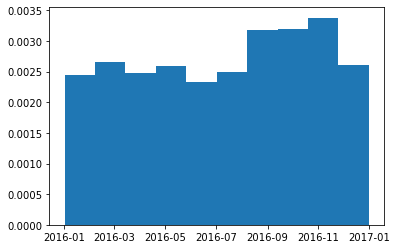

In [261]:
x=clean_only_crashes['DATE TIME']
plt.hist(x, density=True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

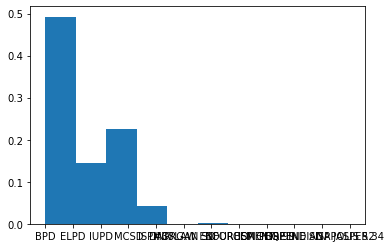

In [258]:
x=clean_only_crashes['Agency']
plt.hist(x, density=True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

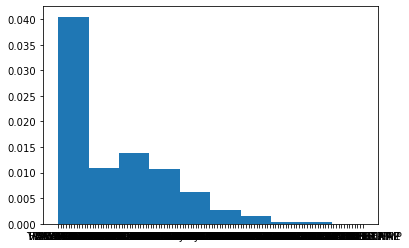

In [262]:
x=clean_all_calls['Nature of Call for Service']
plt.hist(x, density=True)
plt.show